<a href="https://colab.research.google.com/github/jduran2305/IA/blob/Actividad3/IA_actividad3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas.plotting import scatter_matrix

#Jerarquico aglomerativo
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from scipy.cluster.hierarchy import dendrogram

#K means
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


In [376]:
url = "https://raw.githubusercontent.com/jduran2305/IA/main/datos_clustering.csv"
df = pd.read_csv( url , sep=';')

In [377]:
print("\n ***Análisis preliminar del dataset***")
print(df.describe())
print("\n Tipos de datos")
print(df.dtypes)


 ***Análisis preliminar del dataset***
        Total Casos  Total Muertes  ...  Muertes Tuberculosis  Gasto_Salud_%_PBI
count  1.680000e+02     168.000000  ...            168.000000         168.000000
mean   4.223686e+05    9543.404762  ...           6708.440476           6.290893
std    1.587822e+06   31787.767658  ...          35942.627552           2.620120
min    1.000000e+00       0.000000  ...              0.000000           0.000000
25%    6.740750e+03      97.250000  ...             34.500000           4.175000
50%    5.114350e+04     609.000000  ...            325.000000           6.235000
75%    1.915490e+05    4020.500000  ...           2400.000000           8.012500
max    1.625675e+07  299177.000000  ...         436000.000000          16.890000

[8 rows x 5 columns]

 Tipos de datos
País                     object
Total Casos               int64
Total Muertes             int64
Poblacion                 int64
Muertes Tuberculosis      int64
Gasto_Salud_%_PBI       float64


In [378]:
#Atributos de entrada
print("\n ***Atributos de entrada***")
atributos = df.columns.tolist()
atributos = atributos[1:]
print(atributos)


 ***Atributos de entrada***
['Total Casos', 'Total Muertes', 'Poblacion', 'Muertes Tuberculosis', 'Gasto_Salud_%_PBI']


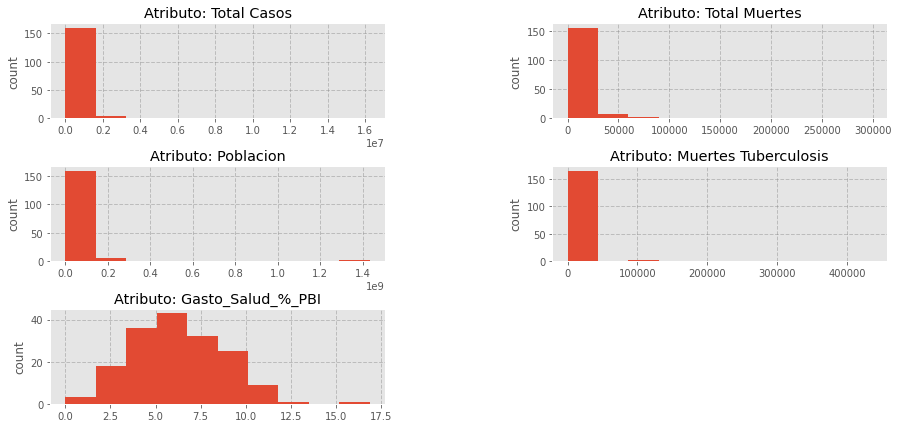

In [379]:
j=1
fig1 = plt.figure("n: i")
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i in atributos: 
    atributoi= df[i]
    ax = fig1.add_subplot(3, 2, j)
    ax.hist(atributoi, bins=10)
    ax.set_ylabel("count")
    ax.set_title("Atributo: {}".format(i))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)
    j+=1
fig1.set_size_inches(15, 7)
plt.show()

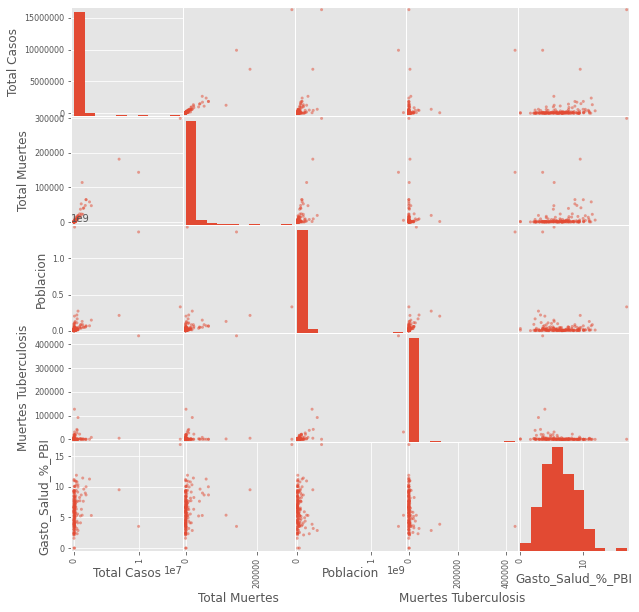

In [380]:
scatter_matrix(df,  figsize=(10, 10))
plt.show()

##Clustering aglomerativo jerarquico


In [381]:
df_jerarquico = df.copy()
X = df_jerarquico
del X["País"]

X["Total Casos"] =  X["Total Casos"] *1e6 /X["Poblacion"]
X["Total Muertes"] =  X["Total Muertes"] *1e6 /X["Poblacion"]
X["Muertes Tuberculosis"] =  X["Muertes Tuberculosis"] *1e6 /X["Poblacion"]

print(X.head())

    Total Casos  Total Muertes  ...  Muertes Tuberculosis  Gasto_Salud_%_PBI
0   1295.234602      51.811487  ...            257.611656               9.40
1  16954.144158     350.401949  ...              2.794831               5.26
2   2139.267519      60.297697  ...             65.036037               6.22
3  96328.288066    1037.058430  ...              0.000000               6.71
4    508.651938      11.657392  ...            534.166230               2.55

[5 rows x 5 columns]


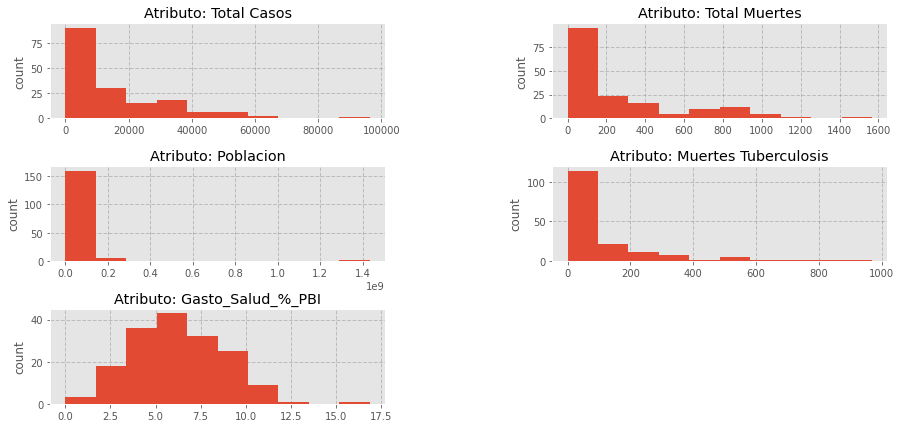

In [382]:
j=1
fig1 = plt.figure("n: i")
fig1.subplots_adjust(hspace=0.5, wspace=0.5)

for i in atributos: 
    atributoi= X[i]
    ax = fig1.add_subplot(3, 2, j)
    ax.hist(atributoi, bins=10)
    ax.set_ylabel("count")
    ax.set_title("Atributo: {}".format(i))
    ax.grid(color='gray', linestyle='dashed', linewidth=1, alpha=0.4)
    ax.axhline(0, color='black', linewidth=0.5)
    j+=1
fig1.set_size_inches(15, 7)
plt.show()

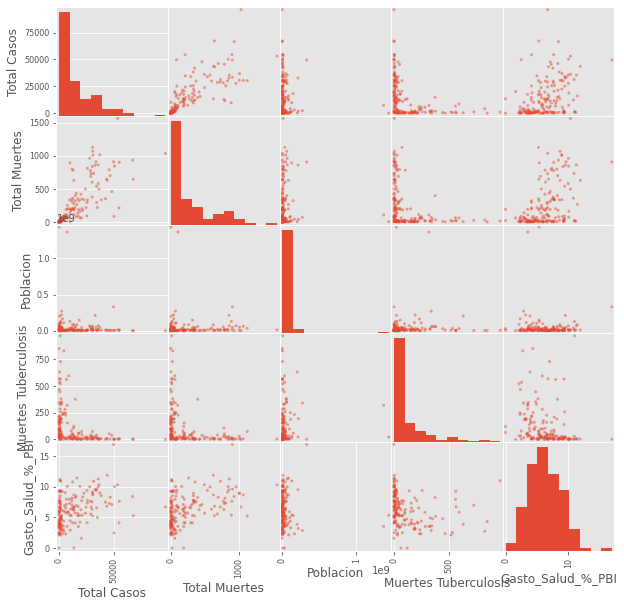

In [383]:
scatter_matrix(X,  figsize=(10, 10))
plt.show()

In [384]:
# definimos el modelo
clstr = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage="complete", affinity="euclidean") 
model = clstr.fit(X)

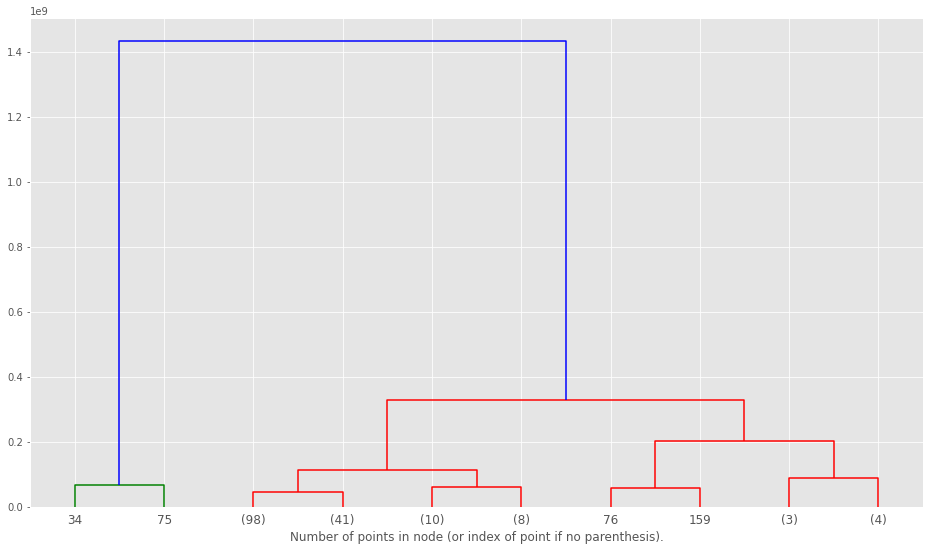

In [385]:
# dendrogram 
#Fuente: https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [386]:
# definimos el modelo  con 5 clusters 
clstr = AgglomerativeClustering(n_clusters=5, linkage="complete", affinity="euclidean") 
model = clstr.fit(X)

#print((clstr.labels_))
#print((clstr.n_leaves_))

In [387]:
X['Agglomerative'] = clstr.labels_;
X.groupby('Agglomerative').size()

Agglomerative
0      7
1      2
2     18
3      2
4    139
dtype: int64

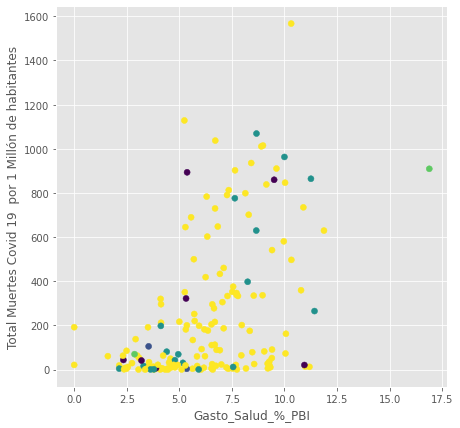

In [388]:
#Graficamos dos variables
plt.figure(figsize=(7,7))
plt.scatter(X["Gasto_Salud_%_PBI"], X["Total Muertes"], c=clstr.fit_predict(X))
plt.xlabel("Gasto_Salud_%_PBI")
plt.ylabel("Total Muertes Covid 19  por 1 Millón de habitantes")
plt.show()

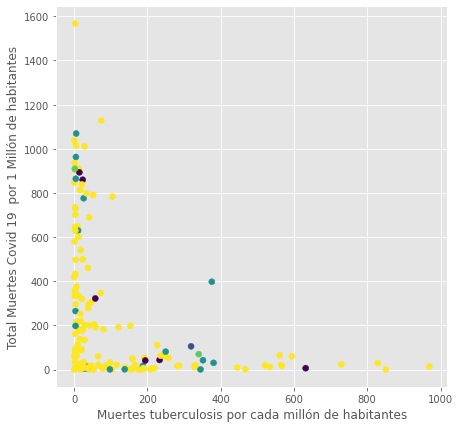

In [389]:
#Graficamos dos variables
plt.figure(figsize=(7,7))
plt.scatter(X["Muertes Tuberculosis"], X["Total Muertes"], c=clstr.fit_predict(X))
plt.xlabel("Muertes tuberculosis por cada millón de habitantes")
plt.ylabel("Total Muertes Covid 19  por 1 Millón de habitantes")
plt.show()

[Text(0, 0.5, 'Total Muertes Covid 19  por 1 Millón de habitantes'),
 Text(0.5, 0, 'Clústeres')]

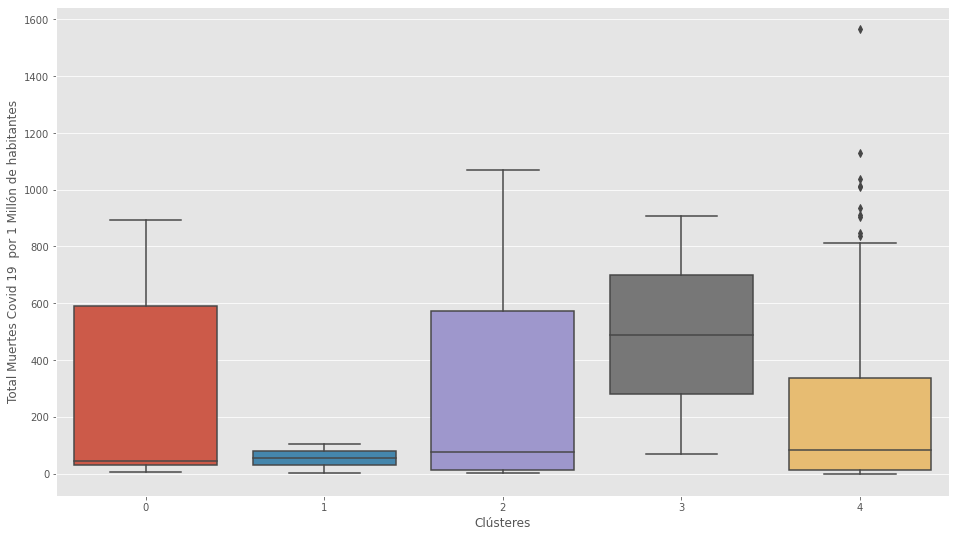

In [390]:
#Box plot
ax = sns.boxplot(x="Agglomerative", y="Total Muertes", data=X)
ax.set(xlabel='Clústeres', ylabel='Total Muertes Covid 19  por 1 Millón de habitantes')

[Text(0, 0.5, 'Gasto en salud - % PIB'), Text(0.5, 0, 'Clústeres')]

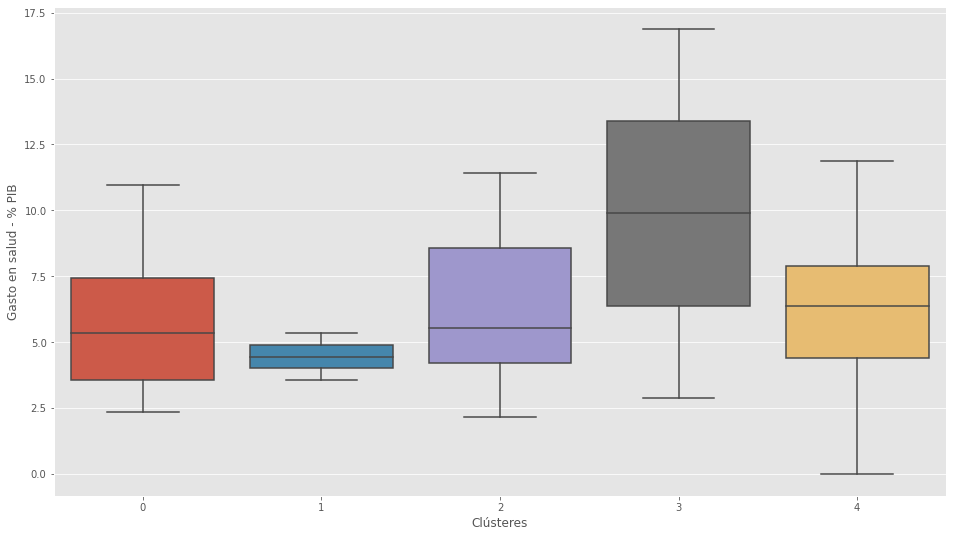

In [391]:
#Box plot
ax = sns.boxplot(x="Agglomerative", y="Gasto_Salud_%_PBI", data=X)
ax.set(xlabel='Clústeres', ylabel='Gasto en salud - % PIB')

##Kmeans

In [392]:
Xk = np.array(df.drop(['País'],1))
# Se escalan los datos
escalar = StandardScaler()
Xk = escalar.fit_transform(Xk)

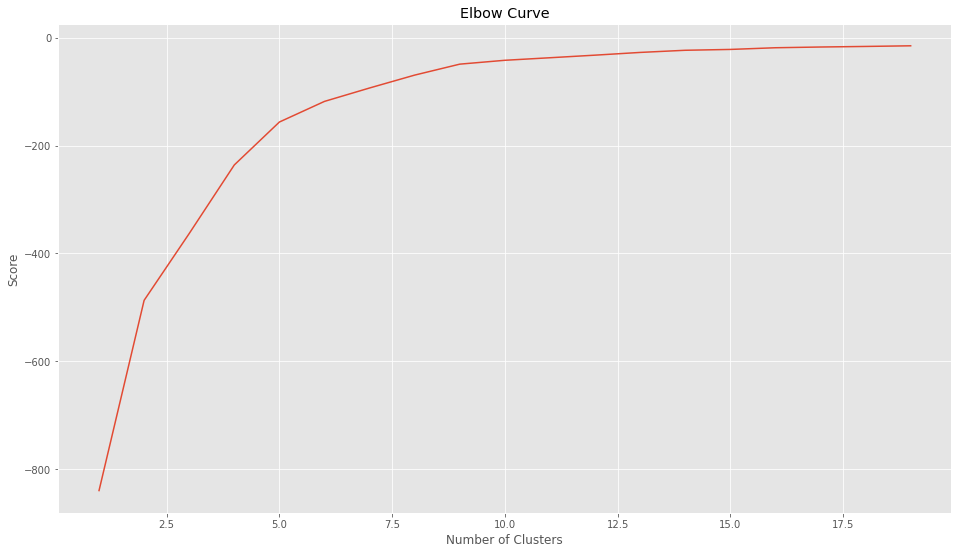

In [393]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Xk).score(Xk) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [394]:
kmeans = KMeans(n_clusters=5).fit(Xk)
centroids = kmeans.cluster_centers_
print(centroids)

[[-0.07901821 -0.06300419 -0.17474289 -0.1576401   0.7327483 ]
 [ 7.0476022   7.28065975  1.43634899 -0.1112986   2.64482633]
 [ 5.97675112  4.22211563  8.43500308 11.97950663 -1.05304979]
 [-0.16641437 -0.1680568  -0.0673366   0.01221058 -0.83746876]
 [-0.20867275 -0.15159189  8.86503578  0.67786308 -0.36017652]]


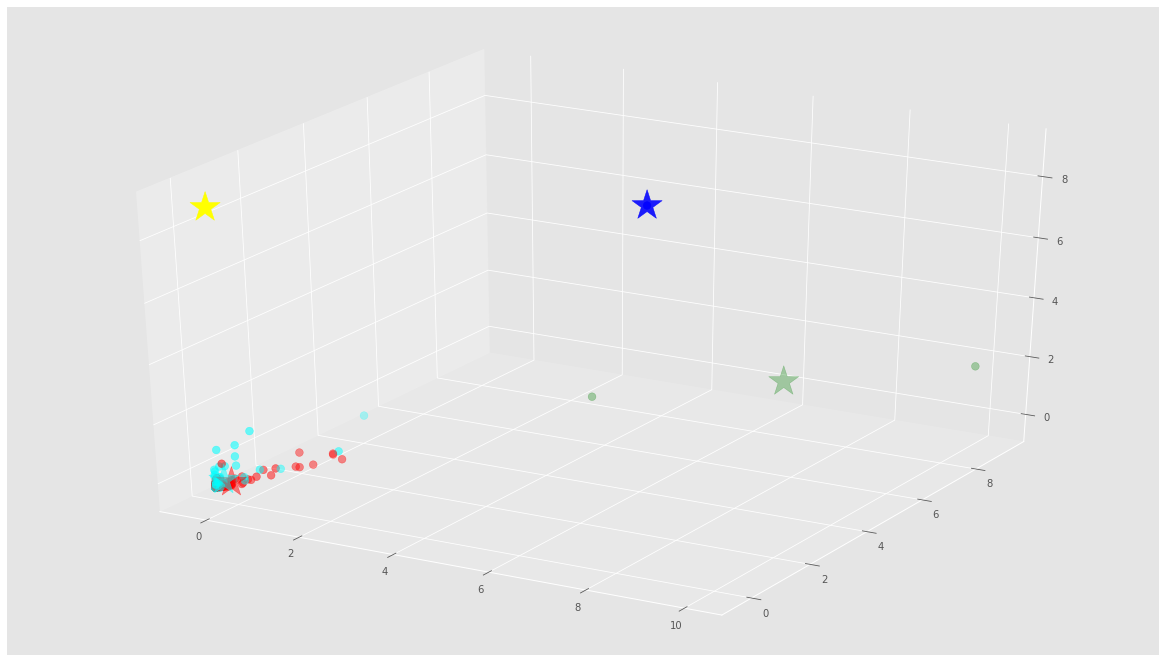

In [395]:
# Predicting the clusters
labels = kmeans.predict(Xk)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(Xk[:, 0], Xk[:, 1], Xk[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

In [396]:
df['Kmeans'] = labels;
df.groupby('Kmeans').size()

Kmeans
0    85
1     2
2     1
3    79
4     1
dtype: int64

En conclusión aunque el método del codo indique 5 grupos realmente se puede decir que son dos grupos y tres paises atípicos.